In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('result.csv')

In [4]:
results = results.drop(columns=["retriever_scores", "Unnamed: 14"])

In [5]:
results.head()

,style,embedding_type,search_method,llm_name,question,true_answer,chatbot_answer,cosine_similarity,correctness_score,faithfulness_score,precision,recall,f1
0,neutral,emb1,approximate,gemini-1.5-flash,Where Psychodiagnostic diagnosis is provided?,At Maccabi Mental Health Clinics.,At Maccabi Mental Health Clinics.,1.000000,0.666667,0.690966,0.4,1.0,0.57143
1,neutral,emb1,approximate,gemini-1.5-flash,How much Examination and treatment for vision ...,The price varies depending on the medical inst...,The cost varies depending on the medical insti...,0.773616,0.257872,0.706106,0.6,1.0,0.75000
2,neutral,emb1,approximate,gemini-1.5-flash,Does doctor's referral is necessary to do a te...,A doctor's referral is necessary.,A doctor's referral is necessary.,1.000000,0.666667,0.628516,0.2,1.0,0.33333
3,neutral,emb1,approximate,gemini-1.5-flash,Who is eligible to transportation for treatmen...,Children and youth members of the Maccabi are ...,Children and youth members of Maccabi who are ...,0.885274,0.406202,0.739675,0.8,1.0,0.88889
4,neutral,emb1,approximate,gemini-1.5-flash,"Where can I vaccinate my baby for ""Pent-up""?",At milk drop stations of Maccabi\r\nIf your vi...,"You can get the ""Pent-up"" vaccine at Maccabi m...",0.833643,0.444548,0.823279,0.2,1.0,0.33333


In [6]:
# Compare between styles (4 graphs per metric)
# LLM + EMBED + SEARCH : 
# EMBED + SEARCH : precision, recall, f1

In [34]:
# Retriever Comparison
# Don't care about style and llm_name
from backend.utils.helpers import decode_embedding_model_name
results['embedding_type'] = results['embedding_type'].apply(decode_embedding_model_name)
retriever_results = results[['question', 'embedding_type', 'search_method','precision','recall', 'f1']].groupby(['question','embedding_type', 'search_method']).mean()
retriever_results_general = results[['embedding_type', 'search_method','precision','recall', 'f1']].groupby(['embedding_type', 'search_method']).mean()
retriever_results_general

precision    recall        f1
embedding_type            search_method                               
cohere                    approximate         0.38  0.657292  0.399646
                          exact               0.38  0.657292  0.399646
models/embedding-001      approximate         0.40  0.690625  0.424646
                          exact               0.40  0.690625  0.424646
models/text-embedding-004 approximate         0.46  0.815625  0.504011
                          exact               0.46  0.815625  0.504011

In [36]:
# add an id to each question
retriever_results['question_id'] = retriever_results.groupby('question').ngroup()

In [31]:
retriever_results.to_csv('retriever_results.csv')

In [37]:
retriever_results

precision  \
question                                           embedding_type            search_method              
Can I come to a health institutions with a serv... cohere                    approximate          0.6   
                                                                             exact                0.6   
                                                   models/embedding-001      approximate          0.6   
                                                                             exact                0.6   
                                                   models/text-embedding-004 approximate          0.6   
                                                                             exact                0.6   
Does doctor's referral is necessary to do a tes... cohere                    approximate          0.2   
                                                                             exact                0.2   
                                                   models/embedding-001      approximate          0.2   
                                                                             exact                0.2   
                                                   models/text-embedding-004 approximate          0.2   
                                                                             exact                0.2   
How much Examination and treatment for vision f... cohere                    approximate          0.4   
                                                                             exact                0.4   
                                                   models/embedding-001      approximate          0.6   
                                                                             exact                0.6   
                                                   models/text-embedding-004 approximate          0.6   
                                                                             exact                0.6   
I want to do clinical mammography, but I don't ... cohere                    approximate          0.4   
                                                                             exact                0.4   
                                                   models/embedding-001      approximate          0.4   
                                                                             exact                0.4   
                                                   models/text-embedding-004 approximate          0.4   
                                                                             exact                0.4   
Is there aclinic for treatment of eating disord... cohere                    approximate          1.0   
                                                                             exact                1.0   
                                                   models/embedding-001      approximate          1.0   
                                                                             exact                1.0   
                                                   models/text-embedding-004 approximate          1.0   
                                                                             exact                1.0   
What is a “home visit”?                            cohere                    approximate          0.0   
                                                                             exact                0.0   
                                                   models/embedding-001      approximate          0.0   
                                                                             exact                0.0   
                                                   models/text-embedding-004 approximate          0.4   
                                                                             exact                0.4   
What is the quarterly cost to visit a specialist?  cohere                    approximate          0.0 

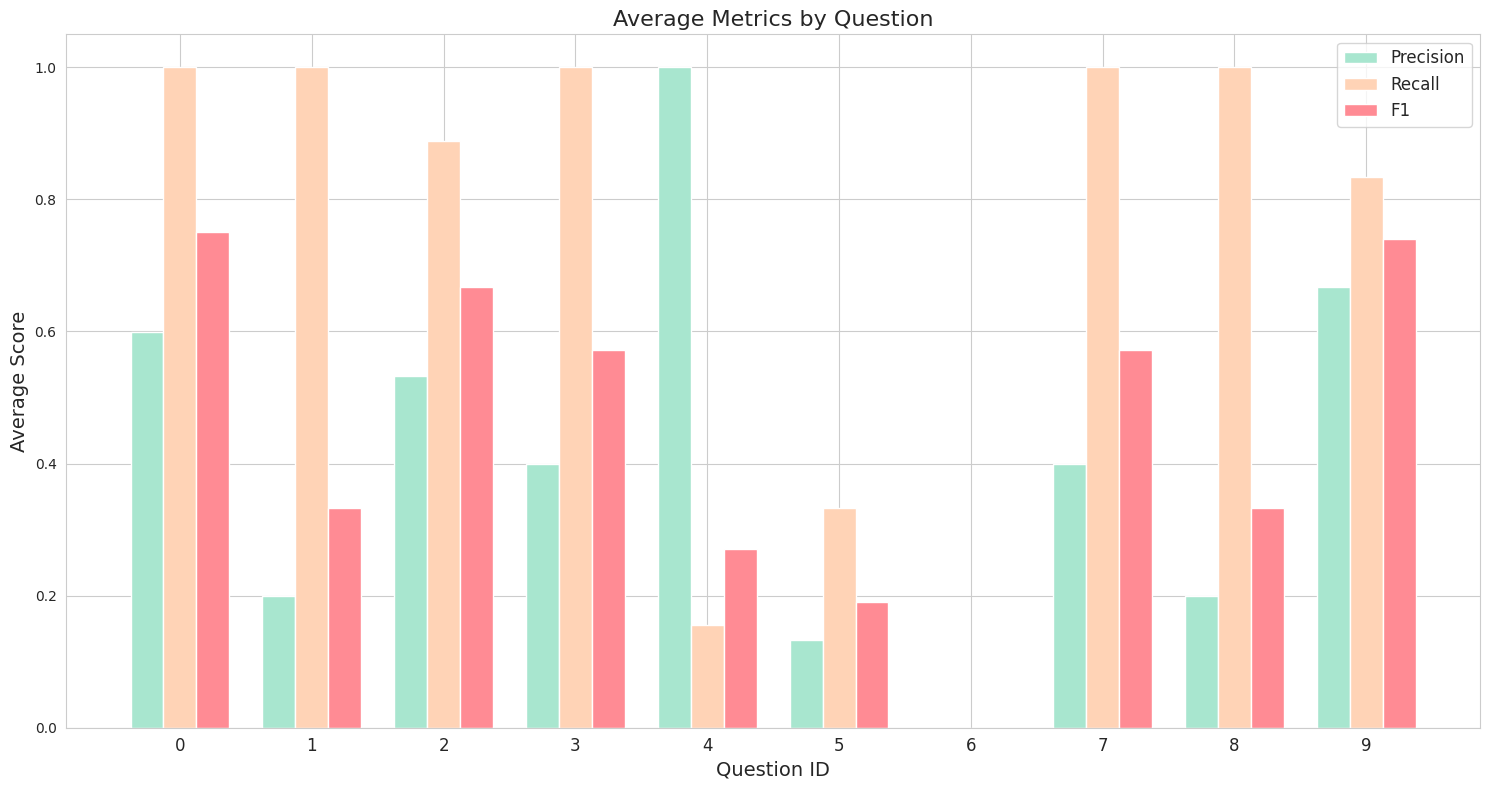

In [45]:
# Calculate average metrics for each question
avg_metrics_by_question = retriever_results.groupby('question_id')[['precision', 'recall', 'f1']].mean().reset_index()

# Create the grouped bar plot
plt.figure(figsize=(15, 8))
x = range(len(avg_metrics_by_question))
width = 0.25
colors = ['#a8e6cf', '#ffd3b6', '#ff8b94']

plt.bar(x, avg_metrics_by_question['precision'], width, label='Precision', color=colors[0])
plt.bar([i + width for i in x], avg_metrics_by_question['recall'], width, label='Recall', color=colors[1])
plt.bar([i + 2 * width for i in x], avg_metrics_by_question['f1'], width, label='F1', color=colors[2])

plt.xlabel('Question ID', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Average Metrics by Question', fontsize=16)
plt.xticks([i + width for i in x], avg_metrics_by_question['question_id'], fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
# Embedding method Comparison

models_results = results[['llm_name','embedding_type', 'cosine_similarity']].groupby(['llm_name', 'embedding_type']).mean()
models_results.to_csv('models_results.csv')
models_results.head(50)

cosine_similarity
llm_name                                    embedding_type                              
gemini-1.5-flash                            cohere                              0.593002
                                            models/embedding-001                0.841384
                                            models/text-embedding-004           0.814340
meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo cohere                              0.625286
                                            models/embedding-001                0.830604
                                            models/text-embedding-004           0.815106
mistralai/Mistral-7B-Instruct-v0.1          cohere                              0.623436
                                            models/embedding-001                0.814078
                                            models/text-embedding-004           0.812899

In [54]:
# Model Comparison
# Don't embed and search

models_results = results[['style', 'llm_name', 'cosine_similarity','correctness_score', 'faithfulness_score']].groupby(['style','llm_name']).mean()
models_results.to_csv('models_results.csv')
models_results.head(50)

cosine_similarity  \
style   llm_name                                                         
elderly gemini-1.5-flash                                      0.827369   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.766900   
        mistralai/Mistral-7B-Instruct-v0.1                    0.758425   
emoji   gemini-1.5-flash                                      0.722855   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.761841   
        mistralai/Mistral-7B-Instruct-v0.1                    0.692826   
kids    gemini-1.5-flash                                      0.737010   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.767190   
        mistralai/Mistral-7B-Instruct-v0.1                    0.747833   
neutral gemini-1.5-flash                                      0.816462   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.761129   
        mistralai/Mistral-7B-Instruct-v0.1                    0.766857   
rhymes  gemini-1.5-flash                                      0.644181   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.727933   
        mistralai/Mistral-7B-Instruct-v0.1                    0.710636   

                                                     correctness_score  \
style   llm_name                                                         
elderly gemini-1.5-flash                                      0.493845   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.473689   
        mistralai/Mistral-7B-Instruct-v0.1                    0.522253   
emoji   gemini-1.5-flash                                      0.416414   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.497697   
        mistralai/Mistral-7B-Instruct-v0.1                    0.517053   
kids    gemini-1.5-flash                                      0.420438   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.484897   
        mistralai/Mistral-7B-Instruct-v0.1                    0.509463   
neutral gemini-1.5-flash                                      0.470302   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.460654   
        mistralai/Mistral-7B-Instruct-v0.1                    0.502841   
rhymes  gemini-1.5-flash                                      0.346209   
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo           0.445885   
        mistralai/Mistral-7B-Instruct-v0.1                    0.440351   

                                                     faithfulness_score  
style   llm_name                                                         
elderly gemini-1.5-flash                                       0.702094  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.731438  
        mistralai/Mistral-7B-Instruct-v0.1                     0.831083  
emoji   gemini-1.5-flash                                       0.686971  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.752136  
        mistralai/Mistral-7B-Instruct-v0.1                     0.736851  
kids    gemini-1.5-flash                                       0.644512  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.705484  
        mistralai/Mistral-7B-Instruct-v0.1                     0.812762  
neutral gemini-1.5-flash                                       0.658818  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.690940  
        mistralai/Mistral-7B-Instruct-v0.1                     0.824009  
rhymes  gemini-1.5-flash                                       0.603984  
        meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo            0.724843  
        mistralai/Mistral-7B-Instruct-v0.1                     0.774221